# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import pandas as pd 

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.23.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# # Originally data source is not available, use the following code to load the data
# import pandas as pd
# data = pd.read_csv('https://datahub.io/machine-learning/mnist_784/r/mnist_784.csv')
# data['class'] = data['class'].astype(str)
# X = data.iloc[:,:-1].to_numpy()
# Y = data.iloc[:,-1].to_numpy()

In [4]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

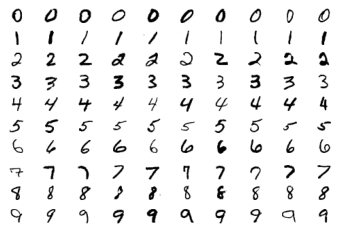

In [5]:
def P1(num_examples=10):

### STUDENT START ###
    
    # Initialize matrix grid
    rows = 0
    
    # Increment digit by 1
    for digit in np.unique(mini_train_labels):
        
        # Duplicate digits across 10 columns
        for col in range(num_examples):
            
            rows += 1
            
            # Create 10x10 subplot
            plt.subplot(
                len(np.unique(mini_train_labels))
                ,num_examples
                ,rows
            )
            
            plt.axis('off')
            
            # Render matrix and reshape to 28x28
            plt.imshow(
                mini_train_data[mini_train_labels == digit][col].reshape(28,28)
                ,cmap=plt.cm.gray_r
            )
            
### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [6]:
def P2(k_values):

### STUDENT START ###

    for k in k_values:
        
        # Initialize knn models
        knn_model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        
        # Fit model on mini train set
        knn_model.fit(mini_train_data, mini_train_labels)
        
        # Predict model on dev set
        dev_model_pred = knn_model.predict(dev_data)
        
        # Compute model accuracy
        model_accuracy = knn_model.score(dev_data, dev_labels)
        
        print('k = {0} Model Accuracy = {1}'. format(k, model_accuracy))
        
        # Produce classification report for k = 1 model
        if k == 1:
            print('\nClassification report for k = 1:\n',
                  classification_report(dev_labels, dev_model_pred))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k = 1 Model Accuracy = 0.884

Classification report for k = 1:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k = 3 Model Accuracy = 0.876
k = 5 Model Accuracy = 0.882
k = 7 Model Accuracy = 0.877
k = 9 Model Accuracy = 0.875


ANSWER:

Based on the results, the highest model accuracy is the 1-kNN model at 0.884. Model accuracy appears to somwhat decrease when kNN is increased. This is probably attributed to padding which results in a more difficult model accuracy prediction. 

Based on the 1-kNN model, the most difficult digit to recognize overall is **digit 8** based on the f1-score (harmonic mean between precision and recall). 

Although precision ($\frac{\text{True Positive}}{\text{True Positive + False Positive}}$) of 0.83 for digit 8 is not the lowest, the recall ($\frac{\text{True Positive}}{\text{True Positive + False Negative}}$) of 0.77 and f1-score of 0.80 are the lowest. 

The precision for digit 9 is the lowest which means that digits are labelled as 9's when they're not. The recall for digit 8 is the lowest which means that digit 8's are often predicted as digits other than 8.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [7]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    for s in train_sizes:
        
        # Initialize 1-kNN model
        knn_model_one = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
        
        # Train on subsets of the train set
        knn_model_one.fit(train_data[:s], train_labels[:s])
        
        # Start timer
        start = time.time()

        # Predict model on dev set
        dev_model_pred_one = knn_model_one.predict(dev_data)
        
        # End time
        end = time.time()
        
        # Compute accuracies
        accuracy = accuracy_score(dev_labels, dev_model_pred_one) 
#         accuracy = knn_model_one.score(dev_data, dev_labels)  
        accuracies.append(accuracy)
        
        print(
            'Training size: {0}, Accuracy: {1}, Time(s): {2:.2f}'.format(
        s, accuracy, end-start)
        )

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Training size: 100, Accuracy: 0.702, Time(s): 0.09
Training size: 200, Accuracy: 0.791, Time(s): 0.13
Training size: 400, Accuracy: 0.811, Time(s): 0.24
Training size: 800, Accuracy: 0.866, Time(s): 0.43
Training size: 1600, Accuracy: 0.905, Time(s): 0.89
Training size: 3200, Accuracy: 0.927, Time(s): 1.84
Training size: 6400, Accuracy: 0.939, Time(s): 3.82
Training size: 12800, Accuracy: 0.952, Time(s): 7.40
Training size: 25600, Accuracy: 0.963, Time(s): 15.21


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

Model 1:
The predicted accuracy for n = 60,000 is 1.2362
The predicted accuracy for n = 120,000 is 1.6374
The predicted accuracy for n = 1,000,000 is 7.5225
R²: 0.4177

Model 2:
The predicted accuracy for n = log(60,000) is 1.0336
The predicted accuracy for n = log(120,000) is 1.0643
The predicted accuracy for n = log(1,000,000) is 1.1583
R²: 0.9068

Model 3:
The predicted accuracy for n = 60,000 with transformed y1 is 0.9833
The predicted accuracy for n = 120,000 with transformed y1 is 0.9911
The predicted accuracy for n = 1,000,000 with transformed y1 is 0.9989
R²: 0.8649

Model 4:
The predicted accuracy for n = log(60,000) with transformed y1-log is 0.9758
The predicted accuracy for n = log(120,000) with transformed y1-log is 0.9819
The predicted accuracy for n = log(1,000,000) with transformed y1-log is 0.9926
R²: 0.9897


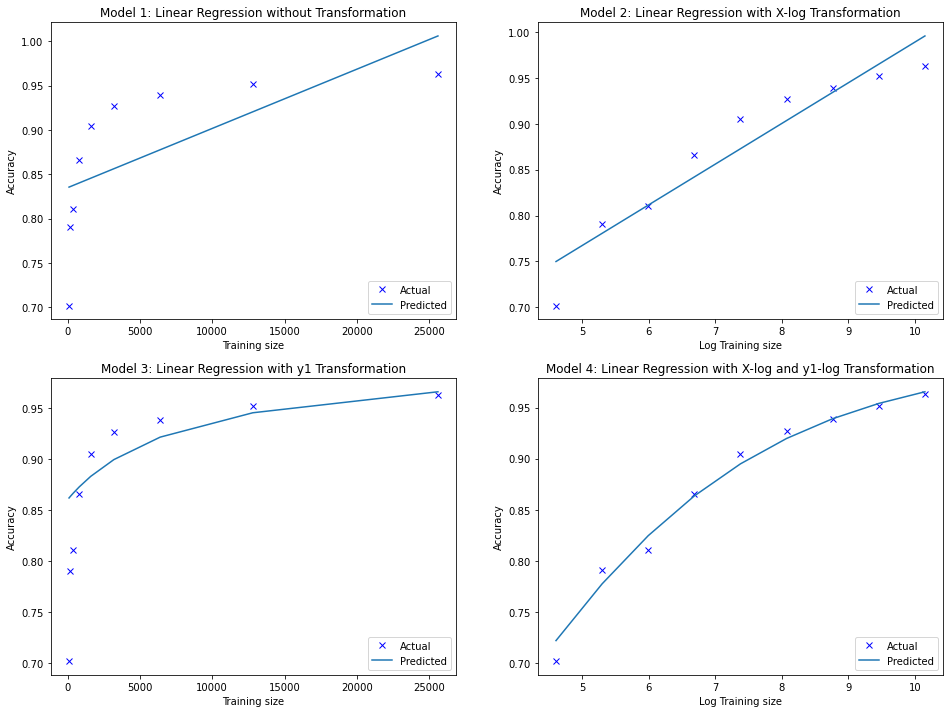

In [8]:
def P4():

### STUDENT START ###

    # Initialize the variables for the regression
    X = np.array(train_sizes).reshape(-1, 1) 
    y = np.array(accuracies)
    n1 = np.array([60000]).reshape(-1,1)
    n2 = np.array([120000]).reshape(-1,1)
    n3 = np.array([1000000]).reshape(-1,1)

    # Apply log transformation on X due to exponential trend
    Xlog = np.log(X)
    n_1_log = np.log(n1)
    n_2_log = np.log(n2)
    n_3_log = np.log(n3)
    
    # Apply outcome transformation
    y1 = np.log(y/(1-y))
    y3 = y/(1-y)

    # Model 1
    # Fit regression line
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred = lin_reg.predict(X)
    
    # Plot the regression
    fig = plt.figure(figsize=(16,12))
    ax = fig.add_subplot(2,2,1)
    ax.plot(X, y, 'bx')
    plt.title('Model 1: Linear Regression without Transformation')
    ax.plot(X, y_pred)
    ax.legend(['Actual','Predicted'], loc='lower right')
    ax.set_xlabel('Training size')
    ax.set_ylabel('Accuracy')

    print('Model 1:')
    print('The predicted accuracy for n = 60,000 is %.4f'%lin_reg.predict(n1))
    print('The predicted accuracy for n = 120,000 is %.4f'%lin_reg.predict(n2))
    print('The predicted accuracy for n = 1,000,000 is %.4f'%lin_reg.predict(n3))
    
    print('R²: {0:.4f}\n'.format(lin_reg.score(X, y)))
    
    # Model 2
    # Fit regression line
    lin_reg = LinearRegression()
    lin_reg.fit(Xlog, y)
    y_pred = lin_reg.predict(Xlog)
    
    # Plot the log regression
    ax = fig.add_subplot(2,2,2)
    ax.plot(Xlog, y, 'bx')
    plt.title('Model 2: Linear Regression with X-log Transformation')
    ax.plot(Xlog, y_pred)
    ax.legend(['Actual','Predicted'], loc='lower right')
    ax.set_xlabel('Log Training size')
    ax.set_ylabel('Accuracy')
    
    print('Model 2:')
    print('The predicted accuracy for n = log(60,000) is %.4f'%lin_reg.predict(n_1_log))    
    print('The predicted accuracy for n = log(120,000) is %.4f'%lin_reg.predict(n_2_log))
    print('The predicted accuracy for n = log(1,000,000) is %.4f'%lin_reg.predict(n_3_log))
    
    print('R²: {0:.4f}\n'.format(lin_reg.score(Xlog, y)))
    
    # Model 3
    # Fit regression line
    lin_reg = LinearRegression()
    lin_reg.fit(X, y3)
    y_pred = lin_reg.predict(X)
    
    # Plot the regression with outcome transformation
    ax = fig.add_subplot(2,2,3)
    ax.plot(X, y3/(1+y3), 'bx')
    plt.title('Model 3: Linear Regression with y1 Transformation')
    ax.plot(X, y_pred/(1+y_pred))
    ax.legend(['Actual','Predicted'], loc='lower right')
    ax.set_xlabel('Training size')
    ax.set_ylabel('Accuracy')
    
    print('Model 3:')
    print('The predicted accuracy for n = 60,000 with transformed y1 is %.4f'%(lin_reg.predict(n1)/(1+lin_reg.predict(n1))))    
    print('The predicted accuracy for n = 120,000 with transformed y1 is %.4f'%(lin_reg.predict(n2)/(1+lin_reg.predict(n2))))
    print('The predicted accuracy for n = 1,000,000 with transformed y1 is %.4f'%(lin_reg.predict(n3)/(1+lin_reg.predict(n3)))) 
    
    print('R²: {0:.4f}\n'.format(lin_reg.score(X, y3)))

    # Model 4
    # Fit regression line
    lin_reg = LinearRegression()
    lin_reg.fit(Xlog, y1)
    y_pred = lin_reg.predict(Xlog)
    
    # Plot the log regression with outcome transformation
    ax = fig.add_subplot(2,2,4)
    ax.plot(Xlog, 1/(1+np.exp(-y1)), 'bx')
    plt.title('Model 4: Linear Regression with X-log and y1-log Transformation')
    ax.plot(Xlog, 1/(1+np.exp(-y_pred)))
    ax.legend(['Actual','Predicted'], loc='lower right')
    ax.set_xlabel('Log Training size')
    ax.set_ylabel('Accuracy')
    
    print('Model 4:')
    print('The predicted accuracy for n = log(60,000) with transformed y1-log is %.4f'%(1/(1+np.exp(-lin_reg.predict(n_1_log)))))    
    print('The predicted accuracy for n = log(120,000) with transformed y1-log is %.4f'%(1/(1+np.exp(-lin_reg.predict(n_2_log)))))
    print('The predicted accuracy for n = log(1,000,000) with transformed y1-log is %.4f'%(1/(1+np.exp(-lin_reg.predict(n_3_log)))))
    
    print('R²: {0:.4f}'.format(lin_reg.score(Xlog, y1)))

### STUDENT END ###

P4()

ANSWER:

In Model 1, we are linearly regressing accuracy on training size without any transformation applied. The X-domain appears to be increasing in an exponential fashion. Hence, this base model is not a good fit. In addition, accuracy should not exceed 1. All of the predicted accuracies for n = 60,000, 120,000, 1,000,000 exceed 1. The relationship between accuracy and training size is clearly non-linear. $R^2$ is poor at 0.4177.

In Model 2, we attempted to apply a log-transformation on X. We obtain a better model compared to the first model. However, our predicted accuracies for all three n's still exceed 1. $R^2$ has improved considerably at 0.9068 indicating a linear relationship after the X-log transformation.

In Model 3, we then transformed the accuracy variable into a logit expression / odds ratio in order to limit the range of accuracies from 0 to 1. Using this approach, our predicted accuracies fall within the 0 to 1 range. $R^2$ has decreased slightly at 0.8649 but still portrays a linear relationship after the y-transformation.

In Model 4, we applied both a log-transformation on X and transformed y. The predicted accuracies for all three accuracies has slightly decreased compared to Model 3. However, they still are within the theoretical range. $R^2$ has increased slightly at 0.9897. Based on the plot, the model appears to be the best fit amongst the 4 models.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Confusion Matrix
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


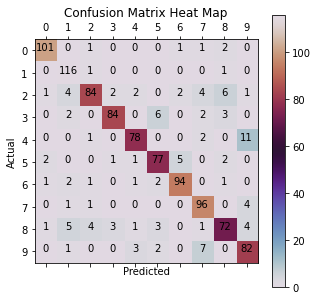

Most confused digit pair is 4 and 9.


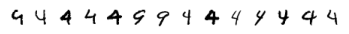

In [9]:
def P5():

### STUDENT START ###
    
    # Create 1-knn classifier
    knn_clf = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    
    # Train and fit on mini train set
    knn_clf.fit(mini_train_data, mini_train_labels)
    
    # Predict using dev set
    dev_pred_model = knn_clf.predict(dev_data)
    
    # Print confusion matrix using predictions
    conf_matrix = confusion_matrix(dev_labels, dev_pred_model)
    print('Confusion Matrix')
    print(conf_matrix)
    
    # Produce confusion matrix in the form of heatmap
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    cmx = ax.matshow(conf_matrix, cmap=plt.cm.twilight)
    
    plt.title('Confusion Matrix Heat Map')
    plt.colorbar(cmx)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(0, 10, step=1))
    
    for x in range(10):
        for y in range(10):
            plt.text(y, x, str(conf_matrix[x][y]), horizontalalignment='center')
    plt.show()
    
    # Output most confused pair of digits
    digit_matrix = np.zeros((10, 10))
    np.fill_diagonal(digit_matrix, np.diag(conf_matrix))
    sum_confused = (conf_matrix - digit_matrix) + (conf_matrix - digit_matrix).T
    top_confused = np.unravel_index(sum_confused.argmax(), sum_confused.shape)
    print('Most confused digit pair is {0} and {1}.'.format(top_confused[0], top_confused[1]))
    
    # Display confused digit pair images
    conf_digit_pair = np.where(((dev_pred_model == str(top_confused[1])) 
                            & (dev_labels == str(top_confused[0]))) 
                            |((dev_pred_model == str(top_confused[0])) 
                            & (dev_labels == str(top_confused[1])))
                           )
    col = 0
    for data_num in conf_digit_pair[0]:
        col += 1
        plt.subplot(1, len(conf_digit_pair[0]), col)
        plt.axis('off')
        plt.imshow(dev_data[data_num].reshape(28,28), cmap=plt.cm.binary)

    ### STUDENT END ###

P5()

ANSWER:

- There are 11 instances in which digit 4 is mistaken as 9.
- There are 3 instances in which digit 9 is mistaken as 4.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [10]:
# # TROUBLESHOOT P6
# from pdb import set_trace
# def blur(data):
#     dataset = data.copy()

#     # Initialize zeroes
#     blurred = np.zeros((28, 28))

#     for i in range(len(dataset)):  
#         # Reshaping each image
#         reshaped = data[i].reshape(28, 28)

#         # Iterate through each pixel
#         for row in range(28):
#             for col in range(28):                    
#                 # Slicing from top to bottom rows then left to right columns 
#                 # row+2 and col+2 are required to ensure corner cases are non-inclusive
#                 sliced = reshaped[max(0, row-1):row+2, max(0, col-1):col+2]
                
#                 # Average the neighboring pixel values 
#                 blurred[row][col] = np.sum(sliced) / float(sliced.size)
        
#         # Returning image back into dataset
#         dataset[i] = blurred.reshape(data.shape[1])
# #         set_trace()
#     return dataset

# # blur(mini_train_data)

In [11]:
def P6():
    
### STUDENT START ###
    
    # Implement simplified Gaussian blur filter using 8 neighboring pixels
    def blur(data):
        dataset = data.copy()
        
        # Initialize zeroes
        blurred = np.zeros((28, 28))
        
        for i in range(len(dataset)):  
            # Reshaping each image
            reshaped = data[i].reshape(28, 28)
            
            # Iterate through each pixel
            for row in range(28):
                for col in range(28):                    
                    # Slicing from top to bottom rows then left to right columns 
                    # row+2 and col+2 are required to ensure corner cases are non-inclusive
                    sliced = reshaped[max(0, row-1):row+2, max(0, col-1):col+2]
                    
                    # Average the neighboring pixel values 
                    blurred[row][col] = np.sum(sliced) / float(sliced.size)
            
            # Returning image back into dataset
            dataset[i] = blurred.reshape(data.shape[1])
    
        return dataset

    # Calculate model accuracy of blurred images using kNN 
    def accuracy(training_set, training_label, dev_set, dev_label):
        
        model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
        model.fit(training_set, training_label)
        model.predict(dev_set)  
        return model.score(dev_set, dev_label)
    
    # Filter dataset using blur function
    filter_train = blur(mini_train_data)
    filter_dev = blur(dev_data)

    # Model 1: Do not use the filter
    print('Accuracy on Model 1 (No filter): {0}'.format(accuracy(
        mini_train_data, mini_train_labels, dev_data, dev_labels)))
    
    # Model 2: Filter the training data but not the dev data
    print('Accuracy on Model 2 (Filter training data): {0}'.format(accuracy(
        filter_train, mini_train_labels, dev_data, dev_labels)))
    
    # Model 3: Filter the dev data but not the training data
    print('Accuracy on Model 3 (Filter dev data): {0}'.format(accuracy(
        mini_train_data, mini_train_labels, filter_dev, dev_labels)))
    
    # Model 4: Filter both training data and dev data
    print('Accuracy on Model 4 (Filter both training and dev data): {0}'.format(accuracy(
        filter_train, mini_train_labels, filter_dev, dev_labels)))
      
### STUDENT END ###

P6()

Accuracy on Model 1 (No filter): 0.884
Accuracy on Model 2 (Filter training data): 0.908
Accuracy on Model 3 (Filter dev data): 0.868
Accuracy on Model 4 (Filter both training and dev data): 0.904


ANSWER:

There is slight improvement in model accuracy computation after blurring data using a simplified Gaussian blur filter (weighted average of 8 neighboring pixels and original value). However, blurring just the development data returns a slightly decreased accuracy compared to the unfiltered model. Filtering just the training data returns the highest model accuracy at 0.908. The blurring process is a considerably computation-intensive process for a slight increase in accuracy.

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [12]:
def P7():

### STUDENT START ###
    
    # BernoulliNB - binarize to set white/black threshold to 0.1
    bernoulli_nb = BernoulliNB(binarize=0.1)
    bernoulli_nb.fit(mini_train_data, mini_train_labels)
    print('Bernoulli NB Model Accuracy: {}'.format(bernoulli_nb.score(dev_data, dev_labels)))
   
    # Multinomial NB - categorize to set white/gray/black thresholds to 0.1 and 0.9
    multinom_nb = MultinomialNB()
    
    mapped_train_data = mini_train_data.copy()
    mapped_train_data[(mini_train_data < 0.1)] = 0
    mapped_train_data[(mini_train_data > 0.1) & (mini_train_data < 0.9)] = 1
    mapped_train_data[(mini_train_data > 0.9)] = 2
    
    mapped_dev_data = dev_data.copy()
    mapped_dev_data[(dev_data < 0.1)] = 0
    mapped_dev_data[(dev_data > 0.1) & (dev_data < 0.9)] = 1
    mapped_dev_data[(dev_data > 0.9)] = 2
    
    multinom_nb.fit(mapped_train_data, mini_train_labels)
    print('Multinomial NB Model Accuracy: {}'.format(multinom_nb.score(mapped_dev_data, dev_labels)))
    
### STUDENT END ###

P7()

Bernoulli NB Model Accuracy: 0.814
Multinomial NB Model Accuracy: 0.807


ANSWER:

The multinomial version did not improve performance as indicated in the model accuracies above. This is likely due to a small degree of overfitting as the "gray" values are not great at predicting the digits. The Bernoulli NB version with binarized "white" and "black" categories are sufficient for this model.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

/Users/HanXinRu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


  param_alpha  mean_test_score  rank_test_score
0       1e-10            0.814                5
1      0.0001            0.819                3
2       0.001            0.825                1
3        0.01            0.822                2
4         0.1            0.818                4
5         0.5            0.813                6
6           1            0.809                7
7           2            0.805                8
8          10            0.783                9

Best alpha =  {'alpha': 0.001}


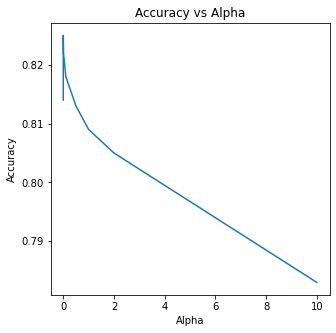

In [13]:
def P8(alphas):

### STUDENT START ###

    # Use GridSearchCV to vary alpha
    gscv = GridSearchCV(BernoulliNB(binarize=0), param_grid=alphas, 
                        cv=5, scoring='accuracy', iid=False)
    gscv.fit(mini_train_data, mini_train_labels)
    
    # Output result
    df = pd.DataFrame(gscv.cv_results_)
    print(df.loc[:,['param_alpha', 'mean_test_score', 'rank_test_score']])
  
    # Plot Accuracy vs Alpha
    plt.figure(figsize=(5, 5))
    plt.plot(df.param_alpha, df.mean_test_score)
    plt.title('Accuracy vs Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Accuracy')

    return gscv

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

ANSWER:

The best value for alpha is 0.001. The accuracy starts to decrease as nears 0 when alpha < 0.001 due to less smoothing producing excess noise in the data. This is as expected as accuracy appears to somewhat follow a parabolic trend based on the plot generated above. As alpha increases past 0.001, accuracy starts to decrease as over-smoothing (decreases complexity) of the data occurs reducing valuable data variability. 

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [14]:
import warnings
warnings.filterwarnings('ignore')

def P9():

### STUDENT END ###

    # Fit GaussianNB model prior fix
    gauss_nb = GaussianNB()
    gauss_nb.fit(mini_train_data, mini_train_labels)
    print('Gaussian NB Model Accuracy Initial: {}'.format(gauss_nb.score(dev_data, dev_labels)))
    
    # Theta - Mean
    print('\nTheta Mean: {0:.4f}\nTheta Stddev: {1:.4f}\nTheta Min: {2:.4f}\nTheta Max: {3:.4f}'.format(
        np.mean(gauss_nb.theta_), np.std(gauss_nb.theta_), 
        np.min(gauss_nb.theta_), np.max(gauss_nb.theta_)))
    
    # Sigma - Variance
    print('\nSigma Mean: {0:.4f}\nSigma Stddev: {1:.4f}\nSigma Min: {2:.4f}\nSigma Max: {3:.4f}'.format(
        np.mean(gauss_nb.sigma_), np.std(gauss_nb.sigma_), 
        np.min(gauss_nb.sigma_), np.max(gauss_nb.sigma_)))
    
    # Fix sigma
    max_score = []
    for sigma in np.linspace(0, 0.2121):
        gauss_nb.sigma_ = np.full(gauss_nb.sigma_.shape, sigma)
        score = gauss_nb.score(dev_data, dev_labels)
        max_score.append(score)
    print('\nGaussian NB Model Accuracy After Fix: {0} using sigma = {1:.4f}'.format(
        max(max_score), np.linspace(0, 0.2121)[max_score.index(max(max_score))]))
         
### STUDENT END ###

P9()

Gaussian NB Model Accuracy Initial: 0.593

Theta Mean: 0.1323
Theta Stddev: 0.2074
Theta Min: 0.0000
Theta Max: 0.9612

Sigma Mean: 0.0530
Sigma Stddev: 0.0701
Sigma Min: 0.0000
Sigma Max: 0.2121

Gaussian NB Model Accuracy After Fix: 0.804 using sigma = 0.0043


ANSWER:

Gaussian NB model works well when features are normally distributed. However, we know that this is not the case here since digit features are binarized categorically. Hence, the Bernoulli NB model was comparably better and less complex. 

However, by using varying theta (mean) and fixing the sigma (variance/noise) to 0.0043, the model complexity is decreased when sigma is fixed and only the theta parameter is varied. The model accuracy after the fix is 0.804 and is comparable to the Bernoulli NB model accuracy.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

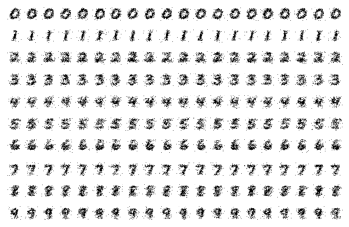

In [15]:
def P10(num_examples):

### STUDENT START ###
    
    # Fit Bernoulli NB model using threshold of 0.1
    bernoulli_nb = BernoulliNB(binarize=0.1)
    bernoulli_nb_model = bernoulli_nb.fit(mini_train_data, mini_train_labels)

    # Convert log probability back to probability
    prob_pixel = np.exp(bernoulli_nb_model.feature_log_prob_)

    # Initialize grid subplot 
    row = 0

    # Increment 0-9 digits
    for digit in range(10):
    
        # Keep higher pixel probability compared to randomly-generated digit between 0 and 1
        grid = prob_pixel[digit] > np.random.rand(num_examples,28*28)
    
        # Duplicate 20 images for each digit
        for image in range(num_examples):
            row += 1
        
            # Plot 10x20 grid
            plt.subplot(10, num_examples, row)
            plt.axis('off')
        
            # Iterate through grid and reshape images to 28x28 pixels 
            plt.imshow(grid[image].reshape(28,28), cmap=plt.cm.gray_r)

### STUDENT END ###

P10(20)

ANSWER:

The generated digit images appear to be worse/more blurry compared to the training digit images. As we reproduced the digits dataset from a random distribution, we observed more variability/noise. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [16]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    
    # Train model
    bernoulli_nb = BernoulliNB(alpha=0.001, binarize=0)
    bernoulli_nb.fit(mini_train_data, mini_train_labels)
    
    # Generate prediction
    y_pred = bernoulli_nb.predict(dev_data)
    y_pred_prob = bernoulli_nb.predict_proba(dev_data)

    # Iterate through predicted data to bucketize
    for index, pred_label in enumerate(y_pred):
        
        # Obtain max posterior probability for each prediction
        max_post_prob = max(y_pred_prob[index])
        
        # Bucketize predicted probability
        bucket_i = sum(max_post_prob > buckets)
        
        # Count and sum correct predictions
        correct[bucket_i] += 1 if pred_label == dev_labels[index] else 0
        total[bucket_i] += 1

    return correct, total
               
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


ANSWER:

There is a positive correlation between posterior probability and accuracy. As the posterior probability increases, accuracy increases as well. However, this is a weakly calibrated classifer as the accuracy is only 0.433 when posterior probability of the predicted class is between 0.9 and 0.999.  As posterior probability approaches 1, the accuracy improves greatly.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [17]:
def P12():

### STUDENT START ###
    
    # Summing pixel values function
    def sum_pixel_values(data):
        
        # Initialize features matrices
        new_matrix = np.zeros((data.shape[0], 2*28))
        
        # Compute sum of row and column for pixel values
        for i, digit in enumerate(data):
            sum_row = np.sum(digit.reshape(28, 28), axis=1)
            sum_col = np.sum(digit.reshape(28,28), axis=0)
            new_matrix[i] = np.append(sum_row, sum_col)
        
        # Average by dividing with either max sum of row or column
        new_matrix = new_matrix/np.amax(new_matrix)
        
        return np.hstack((data, new_matrix))
    
    
    new_data = sum_pixel_values(mini_train_data)
    new_dev_data = sum_pixel_values(dev_data)
    
    # Train model with new features
    bernoulli_nb = BernoulliNB(alpha=0.001, binarize=0)
    
    # Compute original accuracy of model
    bernoulli_nb.fit(mini_train_data, mini_train_labels)
    original_accuracy = bernoulli_nb.score(dev_data, dev_labels)
    
    # Compute accuracy of model after additional features included
    bernoulli_nb.fit(new_data, mini_train_labels)
    after_accuracy = bernoulli_nb.score(new_dev_data, dev_labels)
    
    print('Original Accuracy: {0} \nAccuracy after summing pixel values: {1}'.format(
        original_accuracy, after_accuracy))

### STUDENT END ###

P12()

Original Accuracy: 0.823 
Accuracy after summing pixel values: 0.824
